<a href="https://colab.research.google.com/github/datadigger01/inter_trade/blob/master/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI와무역투자론/Data/default_credit_card.csv')
df
#pd.options.display.max_columns=50

,Cust_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# predicators & target
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
label = ['default_YN']

In [5]:
from sklearn.model_selection import train_test_split
# Split Data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.25, random_state=365)
X_train
#y_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
6727,220000,1,1,2,29,0,0,0,0,0,...,183838,157898,164860,168294,10110,12000,5852,10000,6610,5836
29219,20000,1,2,3,25,0,0,0,0,0,...,2862,3247,2857,2467,1040,1225,1000,0,2500,491
29528,20000,1,2,1,47,0,0,0,0,0,...,16102,18926,18125,18714,1000,1376,3200,1399,1102,369
1217,340000,2,1,1,30,0,0,0,0,0,...,259651,243094,223907,216912,30076,25118,20085,10041,8184,6626
11889,30000,2,2,2,22,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,350000,1,2,2,36,0,0,0,0,0,...,234254,211309,210897,191037,9503,9015,7511,8011,7361,7011
13147,360000,2,1,2,29,0,0,0,0,0,...,82386,50887,52249,35311,90044,10090,50006,20000,5000,20000
4897,80000,2,2,1,37,0,0,0,0,0,...,51616,47843,48427,49101,2103,2023,1850,1800,1806,1516
2740,70000,2,2,1,28,0,0,0,0,0,...,28978,17008,13780,14593,1747,1272,1212,1000,1020,800


## Boosting 알고리즘 호출

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [12]:
# Boosting

# Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=100,   # the number of weak learner
                                    max_depth=5,
                                    min_samples_leaf=8
                                    ).fit(X_train, y_train)

# LightGBM
lg_gbm = LGBMClassifier(n_estimators=100,
                        max_depth=5,
                        num_leaves=20).fit(X_train, y_train)

# XGboosting
xgb_gbm = XGBClassifier(n_estimators=100,
                        max_depth=5
                        ).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4952, number of negative: 17548
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3265
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220089 -> initscore=-1.265148
[LightGBM] [Info] Start training from score -1.265148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [13]:
pred_gbm = gbm.predict(X_test)
pred_lg_gbm = lg_gbm.predict(X_test)
pred_xgb = xgb_gbm.predict(X_test)

In [15]:
pred_gbm = pd.DataFrame(pred_gbm, columns=['predicted_gbm'])
pred_lg_gbm = pd.DataFrame(pred_lg_gbm, columns=['predicted_lg_gbm'])
pred_xgb = pd.DataFrame(pred_xgb, columns=['predicted_xgb'])

real_value = y_test.reset_index()

result=pd.concat([real_value,pred_gbm, pred_lg_gbm,pred_xgb],axis=1)
result

,index,default_YN,predicted_gbm,predicted_lg_gbm,predicted_xgb
0,24829,0,0,0,0
1,9495,0,0,0,0
2,29680,0,0,0,0
3,12364,0,0,0,0
4,5748,0,0,0,0
...,...,...,...,...,...
7495,16715,0,0,0,1
7496,19553,0,0,0,0
7497,21640,0,0,0,0
7498,25493,0,0,0,0


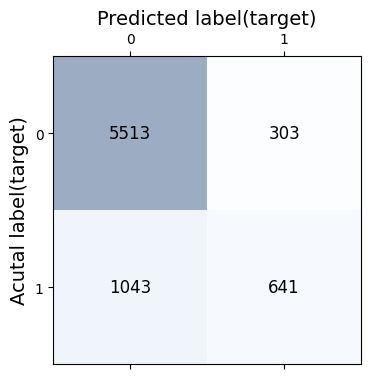

In [21]:
from sklearn.metrics import confusion_matrix
con_m = confusion_matrix(y_test, pred_gbm, normalize=None)  # normalize=c('true','pred','all'), None


fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

In [ ]:
#